<a href="https://colab.research.google.com/github/MafikengZ/Unsupervised-Learning-Recommender-Systems/blob/main/engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System
![netflix.jpg](attachment:netflix.jpg)

Recommendation engines is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.such systems have the capability to predict future preferences of items that a person would probably like to have. It works by finding similarities between two items

Broadly, recommender systems can be classified into 3 types:

- **Simple recommenders**:offer generalized recommendations to every user, based on movie popularity and/or genre. The basic ideabehind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

- **Content-based recommenders:** suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.

- **Collaborative filtering engines:** these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.


***Sources:*** 
*https://github.com/ngezler/Implementation-of-Movie-Recommender-System/blob/master/SY_1_Unsupervised_Notebook.ipynb*

*https://www.kaggle.com/najeedosmani/movie-recommender-system-with-eda*

### Benefits of using Recommender Systems

![recommendation-system.png](attachment:recommendation-system.png)

 Organisaztion utilize Recommendation engines to improve their personalised user experience and customer satisfaction and while driving the economic benefits through increased revenue.

## Commet Configurations

In [1]:
!pip3 install comet_ml
!pip3 install IMDbPY
!pip3 install -U -q PyDrive

     |████████████████████████████████| 314 kB 5.0 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 547 kB 59.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=13222cd6882be879824ba5f59b1df3bcd0f0e0907a9a79a7e95516ccda18663d
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
     |████████████████████████████████| 298 kB 4.9 MB/s 


In [2]:
# import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="HfSNpkY9koDD8GCccjV6a7o3K",
    project_name="recommendation-system",
    workspace="mafikengz",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mafikengz/recommendation-system/c1bee0b99b524ec2a8256f0c469ccdc3



## Import Libraries

In [3]:
#Scientific libraries
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#Configurations
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

#### Remotely upload Kaggle Dataset on Colab

In [33]:
#Linux commands
!pip3 install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [34]:
#Download dataset
! kaggle competitions download edsa-movie-recommendation-wilderness

 72% 11.0M/15.3M [00:00<00:00, 112MB/s]
100% 15.3M/15.3M [00:00<00:00, 97.7MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 68.6MB/s]
 97% 110M/113M [00:01<00:00, 96.7MB/s] 
100% 113M/113M [00:01<00:00, 101MB/s] 
 49% 5.00M/10.1M [00:00<00:00, 50.8MB/s]
100% 10.1M/10.1M [00:00<00:00, 64.5MB/s]
 60% 9.00M/15.0M [00:00<00:00, 46.5MB/s]
100% 15.0M/15.0M [00:00<00:00, 59.6MB/s]
  0% 0.00/17.7k [00:00<?, ?B/s]
100% 17.7k/17.7k [00:00<00:00, 13.9MB/s]
  0% 0.00/2.26M [00:00<?, ?B/s]
100% 2.26M/2.26M [00:00<00:00, 122MB/s]
 98% 80.0M/81.9M [00:00<00:00, 77.2MB/s]
100% 81.9M/81.9M [00:00<00:00, 112MB/s] 
  0% 0.00/577k [00:00<?, ?B/s]
100% 577k/577k [00:00<00:00, 178MB/s]


In [47]:
#Unzip datasets
!unzip movies.csv.zip
!unzip train.csv.zip
!unzip test.csv.zip
!unzip tags.csv.zip
!unzip links.csv.zip
!unzip imdb_data.csv.zip
!unzip genome_scores.csv.zip
!unzip sample_submission.csv.zip


y
Archive:  genome_scores.csv.zip
replace genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: genome_scores.csv       
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [77]:
# import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
tags = pd.read_csv('tags.csv')
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
imdb_data = pd.read_csv('imdb_data.csv')
genome = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [54]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [55]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Data Preprocessing

In [56]:
print(f'movies shape: {movies.shape} , train shape: {train.shape}')

movies shape: (62423, 3) , train shape: (10000038, 4)


In [57]:
print(f'Unique Rating: {train.rating.unique()}')

Unique Rating: [4.  4.5 5.  2.  3.  1.  3.5 2.5 0.5 1.5]


In [58]:
#Merge movies and train tables
data = pd.merge(train , movies, on = 'movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
from datetime import datetime

# Convert timestamp to year column representing the year the rating was made on merged dataframe
data['rating_year'] = data['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
data.drop('timestamp', axis=1, inplace=True)

In [60]:
data.iloc[0]

userId                                5163
movieId                              57669
rating                                   4
title                     In Bruges (2008)
genres         Comedy|Crime|Drama|Thriller
rating_year                           2018
Name: 0, dtype: object

In [61]:
data.head()

,userId,movieId,rating,title,genres,rating_year
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2009
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2014
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015


In [15]:
# Find the number of times a user has rated, create a dataframe with the count by userId
train_user = pd.DataFrame(
    data['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


### Grouping Users within specific range of userId count

In [16]:
# Grouping the users within a certain range => determine the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [19]:
import plotly.express as px
# Visualize the insight in the spread, we used figures to determine the spread.
trial_error = np.array([['first_group', group_one,
                         'ratings_count between 1 and 50'],
                        ['Second_group', group_two,
                         'ratings_count between 50 and 500'],
                        ['Third_group', group_three,
                         'ratings_count between 500 and 1000'],
                        ['fourth_group', group_four,
                         'ratings_count between 1000 and 1500'],
                        ['fifth_group', group_five,
                         'ratings_count greater than 1500']])
trial_error_df = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(trial_error_df,
             x=trial_error_df["group"],
             y=trial_error_df["userId_grouping"],
             color=trial_error_df["group"],
             title='Grouped Rating Distribustion')
fig.show()
trial_error_df

,group,userId_grouping,explanation
0,first_group,110010,ratings_count between 1 and 50
1,Second_group,50973,ratings_count between 50 and 500
2,Third_group,1338,ratings_count between 500 and 1000
3,fourth_group,159,ratings_count between 1000 and 1500
4,fifth_group,61,ratings_count greater than 1500


**Note:** Majority of the ratings have been done by relatively new users or users who have inconsistent rating behavior. Based on this information we need to further find alternative ways of obtaining similarities between users by looking into the ratings per movie

In [20]:
# Count the number of times a specific rating has been assigned.
train_rating = pd.DataFrame(
    data['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

,rating,count
0,4.0,2652977
1,3.0,1959759
2,5.0,1445230
3,3.5,1270642
4,4.5,880516
5,2.0,656821
6,2.5,505578
7,1.0,311213
8,1.5,159731
9,0.5,157571


In [21]:
#Visualize the Distribution of Ratings
fig = px.bar(train_rating, x=train_rating['rating'],
             y=train_rating['count'],
             color=train_rating['rating'],
             title='Distribustion by Rating')
fig.show()

**Note:** Rating 4.0 and 3.0 have high frequency: Meaning most movies has a rating of 4.0 with a count of 2.652977M. Which clearly indicates to us that the users in the dataset will opt for giving movies a rating of 4.0

Understanding the distribution of ratings is key to finding common traits between users.

### Analysing the Dataset

In [78]:
#Create a dataframe that outlines size of datasets
dataframes = ['train', 'test', 'tags', 'imdb_data',
              'links', 'movies', 'genome_tags', 'genome_score']

length = [len(train), len(test), len(tags),
         len(imdb_data), len(links), len(movies),
         len(genome_tags), len(genome_score)]

total_length = pd.DataFrame(list(zip(dataframes, length)),
                             columns=['dataframe', 'length'])
total_length

,dataframe,length
0,train,10000038
1,test,5000019
2,tags,1093360
3,imdb_data,27278
4,links,62423
5,movies,62423
6,genome_tags,1128
7,genome_score,15584448


In [79]:
new_row = {'dataframe': 'other', 'length': 180530}
total_length = total_length.append(new_row,
                                     ignore_index=True)
total_length

,dataframe,length
0,train,10000038
1,test,5000019
2,tags,1093360
3,imdb_data,27278
4,links,62423
5,movies,62423
6,genome_tags,1128
7,genome_score,15584448
8,other,180530


In [80]:
# By refining the data frame we were able to see the distribution of the overall data.
total_length = total_length[total_length['length'] > 100000]
total_length

,dataframe,length
0,train,10000038
1,test,5000019
2,tags,1093360
7,genome_score,15584448
8,other,180530


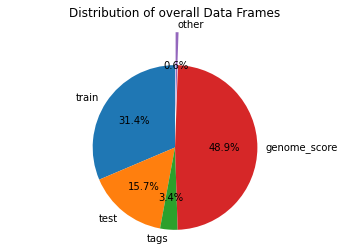

In [81]:
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.4)
fig1, ax1 = plt.subplots()
ax1.pie(total_length['length'].values,
        labels=total_length['dataframe'].values,
        explode=explodeTuple,
        startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribution of overall Data Frames')
plt.show()

In [82]:
len_list = [['train', len(train)], ['tags', len(tags)],
            ['imdb_data', len(imdb_data)], ['links', len(links)],
            ['movies', len(movies)],
            ['genome_tags', len(genome_tags)],
            ['genome_score', len(genome_score)]]
len_df = pd.DataFrame(len_list,
                      columns=['Dataset', 'length'])
fig = px.bar(len_df, x=len_df['Dataset'],
             y=len_df['length'],
             color=len_df['Dataset'],
             title='Distribution of overall Data Frames')
fig.show()

In [83]:
# Obtaining total null values in each Data Frames columns
train_count = pd.DataFrame(train.isnull().sum())
test_count = pd.DataFrame(test.isnull().sum())
tags_count = pd.DataFrame(tags.isnull().sum())
movies_count = pd.DataFrame(movies.isnull().sum())
links_count = pd.DataFrame(links.isnull().sum())
imdb_count = pd.DataFrame(imdb_data.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

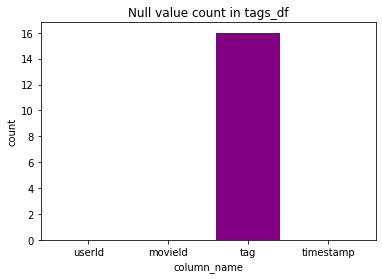

,userId,movieId,tag,timestamp
860902,121710,33826,NaN,1221450908
976395,141727,123,NaN,1199450867
976396,141727,346,NaN,1199451946
976400,141727,1184,NaN,1199452261
976407,141727,1785,NaN,1199452006
976408,141727,2194,NaN,1199450677
976410,141727,2691,NaN,1199451002
976418,141727,4103,NaN,1199451920
976420,141727,4473,NaN,1199451040
976422,141727,4616,NaN,1199452441


In [84]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='purple')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in tags_df')
plt.show()
tags[tags.isnull().any(axis=1)]

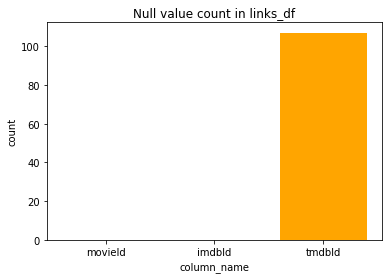

In [87]:
plt.bar(links_count.index,
        links_count.values.reshape(len(links_count), ),
        color='orange')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in links_dataset')
plt.show()

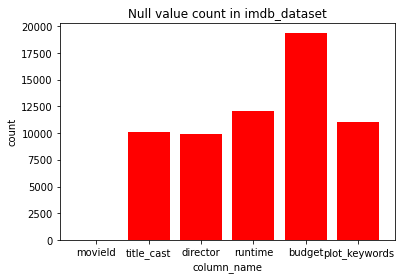

In [88]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='red')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in imdb_dataset')
plt.show()

**Note:** Removing the null values produce a more refined data depending on the amount of null values present. The imdb_dataset had a large amount of null values and dropping these rows would reduce the size of the dataset.

### Visualize the Correlation in dataset

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related.

**Source:** https://en.wikipedia.org/wiki/Correlation

In [89]:
# Correlation between the train_df and tags_df
corr_tag_train = pd.concat([train, tags], axis=1).corr()
corr_tag_train.head()

,userId,movieId,rating,timestamp,userId,movieId,timestamp
userId,1.000000,-0.004270,0.002202,-0.001347,0.000358,0.001594,0.000976
movieId,-0.004270,1.000000,-0.008940,0.520786,-0.000767,0.000471,-0.000131
rating,0.002202,-0.008940,1.000000,0.010301,-0.000945,-0.000976,-0.002160
timestamp,-0.001347,0.520786,0.010301,1.000000,-0.000822,-0.000272,0.000737
userId,0.000358,-0.000767,-0.000945,-0.000822,1.000000,-0.101326,-0.197582


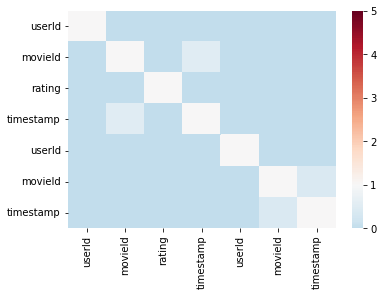

In [90]:
sns.heatmap(corr_tag_train, vmin=0,vmax=5,center=1,cmap="RdBu_r")

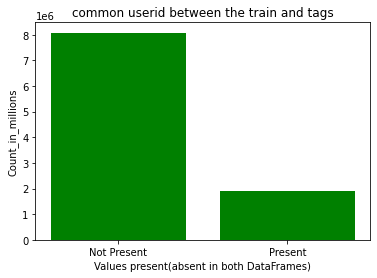

In [91]:
# Finding values in the UserID columns of the tags and train dataframe.
common_userid = pd.DataFrame(train['userId'].isin(tags['userId']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_userid.values.reshape(len(common_userid), ),
        color='green')
plt.xlabel('Values present(absent in both DataFrames)')
plt.ylabel('Count_in_millions')
plt.title('common userid between the train and tags')
plt.show()

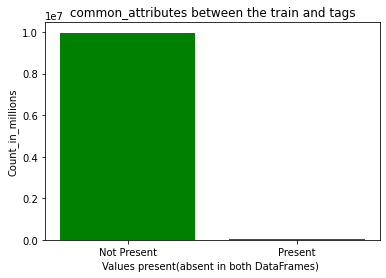

In [92]:
# Finding values in the MovieID columns of the tags and train data frame.
common_movieid = pd.DataFrame(train['movieId'].isin(tags['movieId']).
                          value_counts())
plt.bar(['Not Present', 'Present'],
        common_movieid.values.reshape(len(common_movieid), ),
        color='green')
plt.xlabel('Values present(absent in both DataFrames) ')
plt.ylabel('Count_in_millions')
plt.title('common_attributes between the train and tags')
plt.show()

In [19]:
#Average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().head(10)

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.753731
#1 Cheerleader Camp (2010)                                 1.900000
#Female Pleasure (2018)                                    4.000000
#FollowMe (2019)                                           2.400000
#Horror (2015)                                             2.250000
#Lucky Number (2015)                                       3.000000
#Stuck (2014)                                              0.500000
#realityhigh (2017)                                        2.642857
$ (Dollars) (1971)                                         2.875000
Name: rating, dtype: float64

In [20]:
#Highest average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().sort_values(ascending=False)

title
Final Recourse (2013)        5.0
Lady and the Tramp (2019)    5.0
Virasat (1997)               5.0
Committed (2014)             5.0
Sole Proprietor (2016)       5.0
                            ... 
Foam Party! (2017)           0.5
Good Times (1967)            0.5
Foes (1977)                  0.5
Panteon Woods (2015)         0.5
Say Uncle (2005)             0.5
Name: rating, Length: 48151, dtype: float64

**Note:** There are couple of movies with the highest ratings, which are worth watching

In [21]:
#Count Number of people actually gave ratings to a specific movie.
data.groupby(by='title')['rating'].count().sort_values(ascending=False)


title
Shawshank Redemption, The (1994)                           32831
Forrest Gump (1994)                                        32383
Pulp Fiction (1994)                                        31697
Silence of the Lambs, The (1991)                           29444
Matrix, The (1999)                                         29014
                                                           ...  
Love on the Dole (1941)                                        1
Love's Abiding Joy (2006)                                      1
Love's Brother (2004)                                          1
Love's Coming (2014)                                           1
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)        1
Name: rating, Length: 48151, dtype: int64

*Love on the Dole (1941)* has the Lowest Average rating, not even 5 viewers rated this movie, which cannot be recommended to watch!

In [22]:
#Create a table showcasing Average rating per title and the count
avg_rating_by_title = pd.DataFrame(data.groupby(by='title')['rating'].mean())
avg_rating_by_title['count Ratings']= data.groupby(by='title')['rating'].count() #Number of people who rated!
avg_rating_by_title.head()

,rating,count Ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


In [25]:
avg_rating_by_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48151 entries, "BLOW THE NIGHT!" Let's Spend the Night Together (1983) to 줄탁동시 (2012)
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         48151 non-null  float64
 1   count Ratings  48151 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.1+ MB


## Exploratory Data Analysis(EDA)

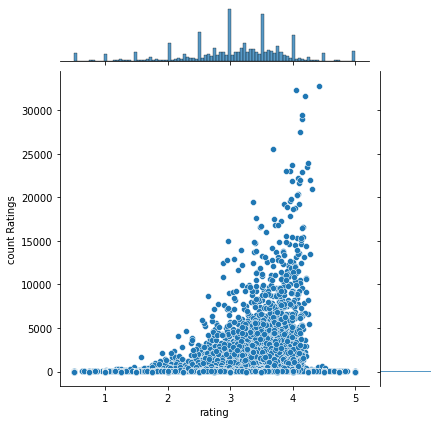

In [26]:
#Visualize the relationships between the Average Ratings and the number of people rated it.
sns.jointplot(x=avg_rating_by_title['rating'], y=avg_rating_by_title['count Ratings'])

**Note:** Movies with ratings in the range of 3 to 4.5 has the most number of ratings.

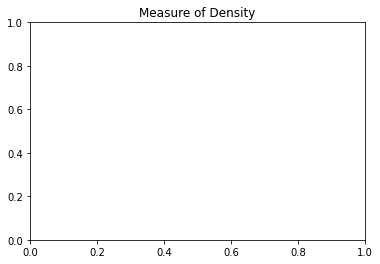

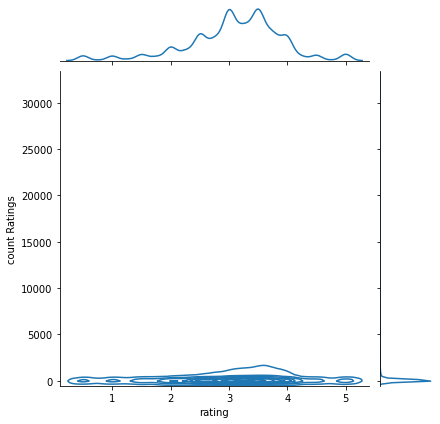

In [32]:
#Visualize the Density Plot
plt.title('Measure of Density')
sns.jointplot(x=avg_rating_by_title['rating'], y=avg_rating_by_title['count Ratings'] , kind='kde')

**Note:** We can see the dark black zone in the plot which represent most no. of datapoints almost have 2 to 4 star ratings. Dark regions generally represent the Dense zones, which simply means alot of datapoints at that region

Text(0, 0.5, 'Counts')

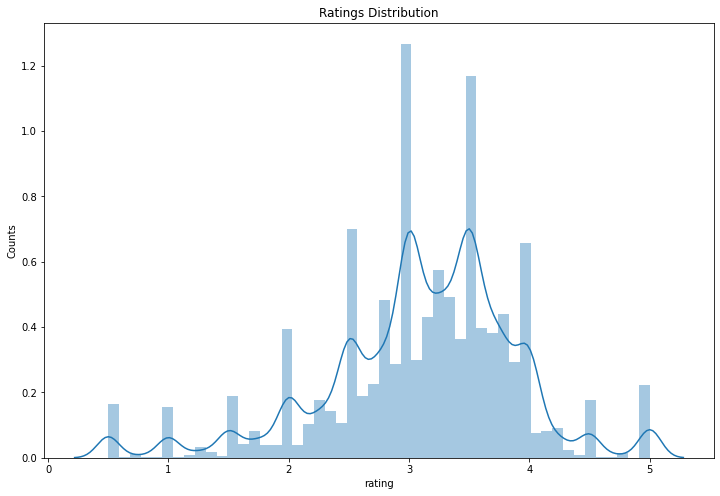

In [29]:
#Visualize the ratings distribution
plt.figure(figsize=(12,8))
sns.distplot(avg_rating_by_title['rating'])
plt.title('Ratings Distribution')
plt.ylabel('Counts')

In [1]:
# Visualize Average Rating per title
sns.displot(data.groupby(by = 'title')['rating'].mean())

NameError: ignored

**Note:** It nearly have a Normal distribution with some negative skew.

We have enough knowledge about the trends that the data is showcasing confidence to actually create a Recommender system that suggests similar kind of movies.

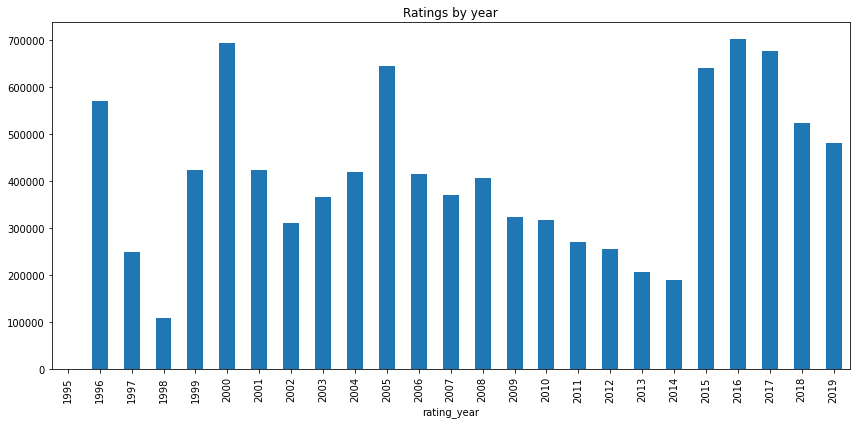

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax1 = data.groupby('rating_year')['rating'].count().plot(kind='bar', title='Ratings by year')
fig.tight_layout()

In [1]:
from imdb import IMDb
ia = IMDb()

for index, value in data['movieId'].items():
  # getting the movie with id
  search = ia.get_movie(value)
  # getting movie year
  data['release_year'] = str(search['year'])

data.head()

ModuleNotFoundError: ignored

## Collaborative Filtering Technique

In [47]:
user_ratings = data.pivot_table(index='userId',columns='title',values='rating')

ValueError: ignored

In [16]:
import re

#create a column for release year
# data['release_year'] = data.title.str.extract('(\d+)')
for year in data['release_year']:
  release_year = re.match(r'^(.*) \((19\d\d|20\d\d)\)$', year)
  name, years = release_year.groups()
  print(f'name: {repr(name)} year: {repr(years)}')

AttributeError: ignored

In [14]:
data['release_year'].unique()

array(['2008', '1995', '2', '7', '1936', '1984', '1998', '2014', '1973',
       '2002', '2011', '2005', '1997', '2000', '2006', '1999', '10',
       '1993', '1989', '13', '2013', '2003', '1981', '2001', '1980',
       '2012', '2007', '1990', '1938', '102', '2004', '1967', '1977',
       '1996', '1971', '1994', '1979', '2010', '1983', '1958', '1933',
       '1988', '1974', '3', '2017', '2015', '1940', '6', '1972', '1946',
       '1992', '4', '1959', '2018', '1985', '9', '2009', '1987', '1952',
       '1963', '12', '2016', '1937', '1954', '1991', '1978', '101',
       '1969', '1964', '1944', '1968', '1982', '1975', '1986', '1976',
       '1960', '1961', '1942', '1922', '1', '50', '1957', '1934', '1962',
       '2049', '571', '1941', '3000', '1926', '1939', '1951', '1970',
       '1935', '1928', '1966', '1965', '15', '37', '2019', '60', '1945',
       '1948', '1953', '1955', '1949', '1956', '1925', '1947', '25',
       '1943', '21', '39', '40', '1927', '120', '1950', '8', '33', '1600',
  

In [ ]:
#Concatenate columns to create a pandas dataframe
userid = pd.Series(df_train['userId'])
movieid = pd.Series(df_train['movieId'])
ratings = pd.Series(df_train['rating'])
title = pd.Series(movies['title'])

data = pd.concat([userid , movieid , ratings , title], axis=1 )

In [ ]:
data.head()

,userId,movieId,rating,title
0,5163,57669,4.0,Toy Story (1995)
1,106343,5,4.5,Jumanji (1995)
2,146790,5459,5.0,Grumpier Old Men (1995)
3,106362,32296,2.0,Waiting to Exhale (1995)
4,9041,366,3.0,Father of the Bride Part II (1995)


In [ ]:
x = data['title'][0].split()
for t in x:
    if t.isdigit():
        print(int(t))

In [ ]:
def _release_year(data):
    years= []
    for text in data.split():
        if text.isdigit():
            years.append(int(text))
data['Release_Year'] = data['title'].apply(_release_year)

AttributeError: 'float' object has no attribute 'split'

KeyError: 'Release_Year'

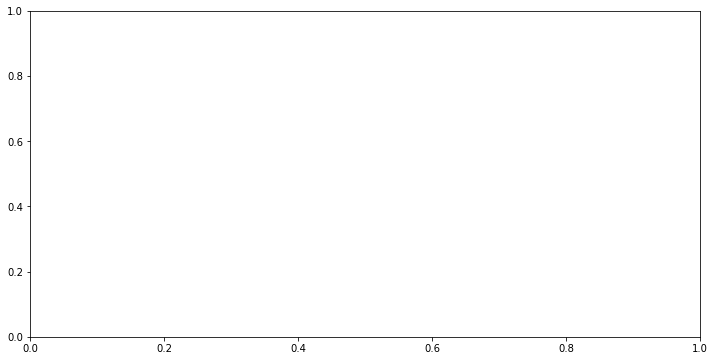

In [ ]:
def _rating_by_year(data):
    return data.groupby('Release_Year')['rating'].mean()

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
data.apply(_rating_by_year).plot(kind='bar', title='Ratings by year')
fig.tight_layout()

In [ ]:
movie_rating = pd.DataFrame(data.groupby('title')['rating'].mean().sort_values(ascending=False))
movie_rating['count'] = pd.DataFrame(data.groupby('title')['rating'].count().sort_values(ascending=False))

In [ ]:
movie_rating.head()

,rating,count
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",5.0,1
Funny Games (1997),5.0,1
The Crooked Circle (1932),5.0,1
The Crisis of Civilization (2012),5.0,1
Fun (1994),5.0,1


In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
data['rating'].mean().plot(kind='bar', title='Ratings Count')
# plt.ylabel('Count')

plt.xlabel('Ratings')
fig.tight_layout()

In [ ]:
data.groupby('title')['userId'].count().sort_values(ascending=False).head()

title
Rebirth (2011)       2
The Tunnel (1933)    2
Macbeth (2015)       2
Deranged (2012)      2
Aladdin (1992)       2
Name: userId, dtype: int64

In [ ]:
data['userId'].value_counts()

72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
          ...  
79087         1
53640         1
121071        1
127098        1
55362         1
Name: userId, Length: 162541, dtype: int64

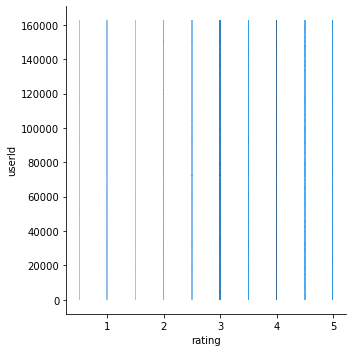

In [ ]:
sns.displot(x = 'rating', y = 'userId' , data = data)

## Reference
- https://en.wikipedia.org/wiki/Recommender_system
- https://github.com/ngezler/Implementation-of-Movie-Recommender-System/blob/master/SY_1_Unsupervised_Notebook.ipynb